In [1]:
import pyspark

from pyspark import SparkContext

conf = pyspark.SparkConf().setMaster("local").setAppName("first")
sc = SparkContext(conf=conf)
sc.stop()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/22 03:54:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import pyspark

import findspark
findspark.init('/usr/local/spark')

from pyspark import SparkContext

conf = pyspark.SparkConf().setMaster("local").setAppName("first")
sc = SparkContext(conf=conf)

In [3]:
# Struct, Array, Map Data types are some of the special data types in Pyspark.
# This helps us when we are defining a nested schema.

# schema = StructType([
#     StructField("id", IntegerType),
#     StructField("name", StringType)
# ])

In [10]:
import pyspark
from pyspark.sql import SparkSession

# Create a Spark Session
spark = SparkSession.builder.appName("example").getOrCreate()

In [13]:
from pyspark.sql.types import *

data =[(1,"a",30),(2,"b",32)]

user_schema = StructType([
    StructField("id", IntegerType()),
    StructField("name", StringType()),
    StructField("age", IntegerType())
])

df = spark.createDataFrame(data,user_schema)
df.show()

+---+----+---+
| id|name|age|
+---+----+---+
|  1|   a| 30|
|  2|   b| 32|
+---+----+---+



In [20]:
data2 = [
    (1, "Alice", ["Reading", "Hiking"]),
    (2, "Bob", ["Swimming", "Gardening", "Painting"]),
    (3, "Charlie", ["Cooking"]),
    (4, "David", ["Photography", "Skiing", "Cooking"])
]

schema2 = StructType([
    StructField("id", IntegerType()),
    StructField("name", StringType()),
    StructField("hobbies", ArrayType(StringType()))
])

df2 = spark.createDataFrame(data2,schema2)
df2.show()

+---+-------+--------------------+
| id|   name|             hobbies|
+---+-------+--------------------+
|  1|  Alice|   [Reading, Hiking]|
|  2|    Bob|[Swimming, Garden...|
|  3|Charlie|           [Cooking]|
|  4|  David|[Photography, Ski...|
+---+-------+--------------------+



In [26]:
from pyspark.sql.functions import explode
df2.select("id", "name", explode("hobbies").alias("hobby")).show()

+---+-------+-----------+
| id|   name|      hobby|
+---+-------+-----------+
|  1|  Alice|    Reading|
|  1|  Alice|     Hiking|
|  2|    Bob|   Swimming|
|  2|    Bob|  Gardening|
|  2|    Bob|   Painting|
|  3|Charlie|    Cooking|
|  4|  David|Photography|
|  4|  David|     Skiing|
|  4|  David|    Cooking|
+---+-------+-----------+



In [28]:
# With Column
df2.withColumn("hobby",explode("hobbies")).drop("hobbies").show()

+---+-------+-----------+
| id|   name|      hobby|
+---+-------+-----------+
|  1|  Alice|    Reading|
|  1|  Alice|     Hiking|
|  2|    Bob|   Swimming|
|  2|    Bob|  Gardening|
|  2|    Bob|   Painting|
|  3|Charlie|    Cooking|
|  4|  David|Photography|
|  4|  David|     Skiing|
|  4|  David|    Cooking|
+---+-------+-----------+



In [29]:
df2.withColumn("hobby",explode("hobbies")).show()

+---+-------+--------------------+-----------+
| id|   name|             hobbies|      hobby|
+---+-------+--------------------+-----------+
|  1|  Alice|   [Reading, Hiking]|    Reading|
|  1|  Alice|   [Reading, Hiking]|     Hiking|
|  2|    Bob|[Swimming, Garden...|   Swimming|
|  2|    Bob|[Swimming, Garden...|  Gardening|
|  2|    Bob|[Swimming, Garden...|   Painting|
|  3|Charlie|           [Cooking]|    Cooking|
|  4|  David|[Photography, Ski...|Photography|
|  4|  David|[Photography, Ski...|     Skiing|
|  4|  David|[Photography, Ski...|    Cooking|
+---+-------+--------------------+-----------+



In [30]:
df2.withColumn("hobbies",explode("hobbies")).show()

+---+-------+-----------+
| id|   name|    hobbies|
+---+-------+-----------+
|  1|  Alice|    Reading|
|  1|  Alice|     Hiking|
|  2|    Bob|   Swimming|
|  2|    Bob|  Gardening|
|  2|    Bob|   Painting|
|  3|Charlie|    Cooking|
|  4|  David|Photography|
|  4|  David|     Skiing|
|  4|  David|    Cooking|
+---+-------+-----------+



In [37]:
from pyspark.sql.functions import *
df2.withColumn("hobbies",explode("hobbies")).withColumn("Ingestion Time", current_timestamp()).show(truncate=False)

+---+-------+-----------+-----------------------+
|id |name   |hobbies    |Ingestion Time         |
+---+-------+-----------+-----------------------+
|1  |Alice  |Reading    |2023-09-22 04:50:52.876|
|1  |Alice  |Hiking     |2023-09-22 04:50:52.876|
|2  |Bob    |Swimming   |2023-09-22 04:50:52.876|
|2  |Bob    |Gardening  |2023-09-22 04:50:52.876|
|2  |Bob    |Painting   |2023-09-22 04:50:52.876|
|3  |Charlie|Cooking    |2023-09-22 04:50:52.876|
|4  |David  |Photography|2023-09-22 04:50:52.876|
|4  |David  |Skiing     |2023-09-22 04:50:52.876|
|4  |David  |Cooking    |2023-09-22 04:50:52.876|
+---+-------+-----------+-----------------------+



In [48]:
df4 = spark.read.json('constructors.json')
df4.show(5,truncate=False)

+-------------+--------------+----------+-----------+------------------------------------------------------------+
|constructorId|constructorRef|name      |nationality|url                                                         |
+-------------+--------------+----------+-----------+------------------------------------------------------------+
|1            |mclaren       |McLaren   |British    |http://en.wikipedia.org/wiki/McLaren                        |
|2            |bmw_sauber    |BMW Sauber|German     |http://en.wikipedia.org/wiki/BMW_Sauber                     |
|3            |williams      |Williams  |British    |http://en.wikipedia.org/wiki/Williams_Grand_Prix_Engineering|
|4            |renault       |Renault   |French     |http://en.wikipedia.org/wiki/Renault_in_Formula_One         |
|5            |toro_rosso    |Toro Rosso|Italian    |http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso            |
+-------------+--------------+----------+-----------+---------------------------

In [59]:
df5 = df4.withColumn("ingestion_date",current_timestamp()).withColumn("path",input_file_name()).drop('url')
df5.show(2)

+-------------+--------------+----------+-----------+--------------------+--------------------+
|constructorId|constructorRef|      name|nationality|      ingestion_date|                path|
+-------------+--------------+----------+-----------+--------------------+--------------------+
|            1|       mclaren|   McLaren|    British|2023-09-22 05:49:...|file:///home/labu...|
|            2|    bmw_sauber|BMW Sauber|     German|2023-09-22 05:49:...|file:///home/labu...|
+-------------+--------------+----------+-----------+--------------------+--------------------+
only showing top 2 rows



In [61]:
df5.write.parquet('constructors_parquet')

In [62]:
df.write.mode('overwrite').parquet("constructor_parquet")

In [65]:
df.write.mode('overwrite').saveAsTable("constructor")

In [66]:
spark.sql("select * from constructor").show(3)

+-------------+--------------+----------+-----------+--------------------+
|constructorId|constructorRef|      name|nationality|                 url|
+-------------+--------------+----------+-----------+--------------------+
|            1|       mclaren|   McLaren|    British|http://en.wikiped...|
|            2|    bmw_sauber|BMW Sauber|     German|http://en.wikiped...|
|            3|      williams|  Williams|    British|http://en.wikiped...|
+-------------+--------------+----------+-----------+--------------------+
only showing top 3 rows



In [67]:
spark.sql("select * from constructor where constructorId=10").show(3)

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|                 url|
+-------------+--------------+-----------+-----------+--------------------+
|           10|   force_india|Force India|     Indian|http://en.wikiped...|
+-------------+--------------+-----------+-----------+--------------------+



In [68]:
df.write.mode('overwrite').option("path",'constructor_table').saveAsTable("constructor")

In [82]:
df6 = spark.read.option("multiLine",True).json("pitstop.json")
df6.show(5)

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|     153|  26.898|  1|       26898|   841|   1|17:05:23|
|      30|  25.021|  1|       25021|   841|   1|17:05:52|
|      17|  23.426| 11|       23426|   841|   1|17:20:48|
|       4|  23.251| 12|       23251|   841|   1|17:22:34|
|      13|  23.842| 13|       23842|   841|   1|17:24:10|
+--------+--------+---+------------+------+----+--------+
only showing top 5 rows



In [84]:
df6.sort("driverId").show(5)

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|       1|  23.227| 16|       23227|   841|   1|17:28:24|
|       1|  23.199| 36|       23199|   841|   2|17:59:29|
|       2|  25.098| 30|       25098|   841|   2|17:51:32|
|       2|  22.994| 15|       22994|   841|   1|17:27:41|
|       3|  23.716| 16|       23716|   841|   1|17:29:00|
+--------+--------+---+------------+------+----+--------+
only showing top 5 rows



In [88]:
grouped_df = df6.groupBy('stop').count().show()

+----+-----+
|stop|count|
+----+-----+
|   1|   21|
|   3|    3|
|   2|   16|
+----+-----+



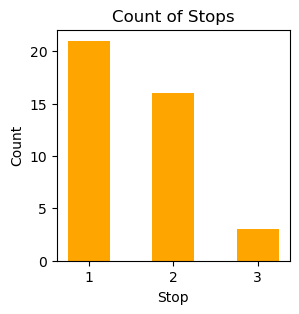

In [113]:
grouped_df = df6.groupBy('stop').count().orderBy('stop')

import matplotlib.pyplot as plt
pandas_df = grouped_df.toPandas()
plt.figure(figsize=(3,3))
plt.bar(pandas_df["stop"].astype(str), pandas_df["count"], color="Orange", width=0.5)
plt.xlabel("Stop")
plt.ylabel("Count")
plt.title("Count of Stops")
plt.show()

In [109]:
df6.sort("driverId").write.mode('overwrite').option("path",'processed_data/pitstops').saveAsTable("pitstops")

In [111]:
df7 = spark.read.parquet('processed_data/pitstops')
df7.show(5)

+--------+--------+---+------------+------+----+--------+
|driverId|duration|lap|milliseconds|raceId|stop|    time|
+--------+--------+---+------------+------+----+--------+
|       1|  23.227| 16|       23227|   841|   1|17:28:24|
|       1|  23.199| 36|       23199|   841|   2|17:59:29|
|       2|  22.994| 15|       22994|   841|   1|17:27:41|
|       2|  25.098| 30|       25098|   841|   2|17:51:32|
|       3|  23.716| 16|       23716|   841|   1|17:29:00|
+--------+--------+---+------------+------+----+--------+
only showing top 5 rows



# Case Study




In [117]:
df_sales = spark.read.option("header",True).option("inferschema",True).csv('sale_data.csv')
df_sales.show()

+--------------+----------+-----------+-------------+-------------------+
|transaction_id|product_id|customer_id|quantity_sold|          timestamp|
+--------------+----------+-----------+-------------+-------------------+
|             1|       101|        201|            5|2023-09-22 10:15:00|
|             2|       102|        202|            3|2023-09-22 11:30:00|
|             3|       101|        203|            2|2023-09-22 12:45:00|
|             4|       103|        204|            1|2023-09-22 14:00:00|
|             5|       102|        205|            4|2023-09-22 15:15:00|
+--------------+----------+-----------+-------------+-------------------+



In [118]:
df_product = spark.read.option("header",True).option("inferschema",True).csv("product_info.csv")
df_product.show()

+----------+------------+-----------+-----+
|product_id|product_name|   category|price|
+----------+------------+-----------+-----+
|       101|      Laptop|Electronics|  800|
|       102|  Smartphone|Electronics|  600|
|       103|        Desk|  Furniture|  250|
|       104|  Headphones|Electronics|  100|
|       105|       Chair|  Furniture|  150|
+----------+------------+-----------+-----+



In [142]:
df_join = df_sales.join(df_product, df_sales.product_id==df_product.product_id, "left")
df_join.show()

+--------------+----------+-----------+-------------+-------------------+----------+------------+-----------+-----+
|transaction_id|product_id|customer_id|quantity_sold|          timestamp|product_id|product_name|   category|price|
+--------------+----------+-----------+-------------+-------------------+----------+------------+-----------+-----+
|             1|       101|        201|            5|2023-09-22 10:15:00|       101|      Laptop|Electronics|  800|
|             2|       102|        202|            3|2023-09-22 11:30:00|       102|  Smartphone|Electronics|  600|
|             3|       101|        203|            2|2023-09-22 12:45:00|       101|      Laptop|Electronics|  800|
|             4|       103|        204|            1|2023-09-22 14:00:00|       103|        Desk|  Furniture|  250|
|             5|       102|        205|            4|2023-09-22 15:15:00|       102|  Smartphone|Electronics|  600|
+--------------+----------+-----------+-------------+-------------------

In [143]:
df_join = df_sales.join(df_product, on='product_id', how="inner")
df_join.show()

+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|product_id|transaction_id|customer_id|quantity_sold|          timestamp|product_name|   category|price|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|       101|             1|        201|            5|2023-09-22 10:15:00|      Laptop|Electronics|  800|
|       102|             2|        202|            3|2023-09-22 11:30:00|  Smartphone|Electronics|  600|
|       101|             3|        203|            2|2023-09-22 12:45:00|      Laptop|Electronics|  800|
|       103|             4|        204|            1|2023-09-22 14:00:00|        Desk|  Furniture|  250|
|       102|             5|        205|            4|2023-09-22 15:15:00|  Smartphone|Electronics|  600|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+



In [144]:
df_join.select(['transaction_id','quantity_sold','category','price']).show()

+--------------+-------------+-----------+-----+
|transaction_id|quantity_sold|   category|price|
+--------------+-------------+-----------+-----+
|             1|            5|Electronics|  800|
|             2|            3|Electronics|  600|
|             3|            2|Electronics|  800|
|             4|            1|  Furniture|  250|
|             5|            4|Electronics|  600|
+--------------+-------------+-----------+-----+



In [145]:
df_join.filter("transaction_id=1").show()

+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|product_id|transaction_id|customer_id|quantity_sold|          timestamp|product_name|   category|price|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|       101|             1|        201|            5|2023-09-22 10:15:00|      Laptop|Electronics|  800|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+



In [146]:
df_join.filter(df_join["price"]>600).show()

+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|product_id|transaction_id|customer_id|quantity_sold|          timestamp|product_name|   category|price|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|       101|             1|        201|            5|2023-09-22 10:15:00|      Laptop|Electronics|  800|
|       101|             3|        203|            2|2023-09-22 12:45:00|      Laptop|Electronics|  800|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+



In [147]:
df_join.where(col('price')>600).show()

+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|product_id|transaction_id|customer_id|quantity_sold|          timestamp|product_name|   category|price|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|       101|             1|        201|            5|2023-09-22 10:15:00|      Laptop|Electronics|  800|
|       101|             3|        203|            2|2023-09-22 12:45:00|      Laptop|Electronics|  800|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+



In [148]:
df_join.where('transaction_id=1').show()

+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|product_id|transaction_id|customer_id|quantity_sold|          timestamp|product_name|   category|price|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+
|       101|             1|        201|            5|2023-09-22 10:15:00|      Laptop|Electronics|  800|
+----------+--------------+-----------+-------------+-------------------+------------+-----------+-----+



# Case Study 2

In [194]:
employees = [(1, "Scott", "Tiger", 1000.0, "united states", "+1 123 456 7890", "123 45 6789"),
             (2, "Henry", "Ford", 1250.0, "India", "+91 234 567 8901", "456 78 9123"),
             (3, "Nick", "Junior", 750.0, "united KINGDOM", "+44 111 111 1111", "222 33 4444"),
             (4, "Bill", "Gomes", 1500.0, "AUSTRALIA", "+61 987 654 3210", "789 12 6118")
]
schema="""employee_id INT, first_name STRING, last_name STRING, salary FLOAT, nationality STRING,phone_number STRING, ssn STRING"""
employees_df = spark.createDataFrame(employees, schema)
employees_df.show()

+-----------+----------+---------+------+--------------+----------------+-----------+
|employee_id|first_name|last_name|salary|   nationality|    phone_number|        ssn|
+-----------+----------+---------+------+--------------+----------------+-----------+
|          1|     Scott|    Tiger|1000.0| united states| +1 123 456 7890|123 45 6789|
|          2|     Henry|     Ford|1250.0|         India|+91 234 567 8901|456 78 9123|
|          3|      Nick|   Junior| 750.0|united KINGDOM|+44 111 111 1111|222 33 4444|
|          4|      Bill|    Gomes|1500.0|     AUSTRALIA|+61 987 654 3210|789 12 6118|
+-----------+----------+---------+------+--------------+----------------+-----------+



In [197]:
employees_df.withColumn("nationality", upper(col("nationality"))).\
    withColumn("ssn_last_4_digits", substring(col("ssn"), -4, 4).cast("int")).\
    withColumn("country_code", split(employees_df["phone_number"], " ")[0].cast("int")).\
    withColumn("area_code", split(employees_df["phone_number"], " ")[1].cast("int")).\
    show()

+-----------+----------+---------+------+--------------+----------------+-----------+-----------------+------------+---------+
|employee_id|first_name|last_name|salary|   nationality|    phone_number|        ssn|ssn_last_4_digits|country_code|area_code|
+-----------+----------+---------+------+--------------+----------------+-----------+-----------------+------------+---------+
|          1|     Scott|    Tiger|1000.0| UNITED STATES| +1 123 456 7890|123 45 6789|             6789|           1|      123|
|          2|     Henry|     Ford|1250.0|         INDIA|+91 234 567 8901|456 78 9123|             9123|          91|      234|
|          3|      Nick|   Junior| 750.0|UNITED KINGDOM|+44 111 111 1111|222 33 4444|             4444|          44|      111|
|          4|      Bill|    Gomes|1500.0|     AUSTRALIA|+61 987 654 3210|789 12 6118|             6118|          61|      987|
+-----------+----------+---------+------+--------------+----------------+-----------+-----------------+--------

In [198]:
spark

# Cache

In [199]:
df.cache()

DataFrame[product_id: int, transaction_id: int, customer_id: int, quantity_sold: int, timestamp: timestamp, product_name: string, category: string, price: int]

In [202]:
df.count()

5

In [201]:
spark.catalog.clearCache()